# 1. BUSINESS UNDERSTANDING
## 1.1 BACKGROUND
There has been significant growth in e-commerce with platforms like Jumia leading the charge. As one of the continent's largest online marketplaces, Jumia hosts over 100,000 retailers, all vying for consumer attention in a highly competitive environment. The dynamics of pricing strategy have become increasingly complex, particularly in categories like electronics where demand is sensitive to pricing fluctuations. Retailers must navigate not only the prices set by their competitors but also various factors such as consumer demand, seasonal sales and promotional events.

As the November Black Friday sales event approaches, the pressure intensifies for retailers to optimize their pricing strategies to capture market share while ensuring profitability. However, the traditional methods of price evaluation can be cumbersome and time-consuming, often relying on manual research or outdated tools. This inefficiency can result in missed opportunities for sales and reduced competitiveness.

## 1.2 PROBLEM STATEMENT
Retailers on Jumia's e-commerce platform face challenges in determining optimal pricing due to the competitive nature of the marketplace with over 100,000 of them and the time-consuming process of evaluating other competitor prices.
The project therefore seeks to analyze the phone catalog data and develop a predictive model that provides data-driven insights, enabling sellers to set competitive prices and maximize profitability effectively ahead of the November black Friday Big Sale.This model is expected to reduce the stress that retailers/sellers have to go through to determins the optimal average price of the product they intend to list on the platform. 
## 1.3 OBJECTIVES
The objective of our project is as outlined below:
* Identify factors contributing to higher product visibility and marketability on Jumia’s first top pages.
* Explore the relationship between phone features and customer reviews.
* Develop a predictive model to recommend competitive, optimal pricing that promotes first-page placement.
* Assess the potential relationship between buyer ratings and product pricing.



# 2. DATA UNDERSTANDING
The data for this project was scraped on October 31, 2024, from the Jumia Kenya e-commerce platform, specifically in the smartphones category and organized by popularity from the first to the last page. This process yielded a total of 12,000 listed devices. For a detailed review of the complete code used in the web scraping process, please refer to the following link: [Web Scraping Script](Scrapped_data.ipynb) The packages utilized in this project included Beautiful Soup and Pandas. The extracted [Data](https://github.com/N-kioko/Smartphones_Price_Prediction_and_Discount_Analysis_Project/blob/main/Data/jumia_phones.csv) was saved in CSV format on our local machine as `jumia_phones.csv`, and consists of the following features:

* **Name:** This describes the brand and the features of the phone.
* **Price:** This describes the current price the phone retails at.
* **Old Price:** This describes the previous price of the phone.
* **Discount:** The % discount calculated
* **Rating:** The buyers explicit rating of the product and service.
* **Number of Reviews:** The number of reviews from possible buyers.
* **Search Ranking:** The page and position of the product in terms of listing and popularity.

 The Name column contains unstructured text, combining brand names and product specifications (e.g., “Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g., numbers followed by "mAh") and storage (e.g., "GB" or "MB"), making data more structured and accessible for analysis.

Data Limitation:

* Dynamic Pricing: Prices on e-commerce platforms fluctuate frequently. Therefore, the scraped prices reflect only the prices at the time of scraping and may not represent current or future values.

* Incomplete or Inconsistent Data: Due to the variety of phone models and brands, some listings may lack uniform information (e.g., missing battery details or memory specifications), which could lead to variability in the parsed features.

* Unverified Ratings and Reviews: Ratings and reviews might be biased or manipulated, affecting any insights or model predictions derived from them.

* Potential Duplicate Listings: Duplicate or near-duplicate entries may exist if the same model is listed by multiple sellers, which could influence popularity and ranking statistics.


In [2]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Loading the dataset
df = pd.read_csv('jumia_phones.csv')
# Checking the first few rows of the dataset
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [5]:
# Summary statistics for numerical columns
df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"Oale POP 8 - 6.6"", 128GB (64GB ROM + 64GB SD C...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 277, Rank 10"
freq,300,1500,1200,900,1800,600,1


#### Summary of findings
* There are 12,000 


# 3. DATA PREPARATION
Efficiently extract and organize key product attributes/features from the product names column.


In [6]:
#Have the Name column in the variable name product_column
product_column = 'Name'  
# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"
# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None
# Extract brand
brand_df = df[product_column].apply(extract_brand).rename('Brand')
# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()

# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"
# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None
# Extract screen size
size_df = df[product_column].apply(extract_screen_size).rename('Screen Size')

# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"
# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None
# Extract RAM
ram_df = df[product_column].apply(extract_ram).rename('RAM')

# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"
# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None
# Extract ROM
rom_df = df[product_column].apply(extract_rom).rename('ROM')

# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"
# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None
# Extract Color
color_df = df[product_column].apply(extract_color).rename('Color')

# Define regex pattern for extracting Warranty
warranty_pattern = r"(\d+)\s*(?:YR|WRTY)"
# Function to extract Warranty
def extract_warranty(name):
    warranty_match = re.search(warranty_pattern, name)
    return warranty_match.group(1) if warranty_match else None
# Extract Warranty
warranty_df = df[product_column].apply(extract_warranty).rename('Warranty')

# Function to extract Camera
def extract_camera(name):
    camera_pattern = r'(\d+MP)'
    match = re.search(camera_pattern, name)
    return match.group(1).strip() if match else None
# Extract Camera
camera_df = df[product_column].apply(extract_camera).rename('Camera')
# Function to extract Battery
def extract_battery(name):
    battery_pattern = r'(\d{4}mAh)'
    match = re.search(battery_pattern, name)
    return match.group(1).strip() if match else None
# Extract Battery
battery_df = df[product_column].apply(extract_battery).rename('Battery Power')

# Function to extract Number of Sims
def extract_sim(name):
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    match = re.search(sim_pattern, name)
    if match:
        return 2 if "Dual" in match.group(0) else 1
    return None
# Extract SIMs
sim_df = df[product_column].apply(extract_sim).rename('Number of SIMs')

# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, warranty_df, camera_df, battery_df, sim_df],
    axis=1
)
# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, df.drop(columns=[product_column])],
    axis=1
)
# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,NaN,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,NaN,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,50MP,5000mAh,2.0,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,None,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [7]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d+)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,NaN,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,NaN,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,50MP,5000mAh,2.0,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,None,50MP,5000mAh,NaN,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


# 4. DATA CLEANING
1. First convert the Screen size, RAM, ROM, Page, Rank, Price, Rating and Old Price to integers or float.

2. Secondly, check for null values and handle as required.

3. Thirdly, check for duplicates.

In [8]:
# DATA TYPE CONVERSION

# Convert Screen Size and Rating to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Number of Reviews to integers, filling null values with 0
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

# View the first 6 rows of the final set
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,None,5000mAh,NaN,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,50MP,5000mAh,NaN,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,50MP,5000mAh,NaN,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,None,50MP,5000mAh,2.0,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,None,50MP,5000mAh,NaN,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [9]:
final_df.shape

(12000, 17)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           3000 non-null   object 
 6   Camera             8700 non-null   object 
 7   Battery Power      9300 non-null   object 
 8   Number of SIMs     3300 non-null   float64
 9   Price              12000 non-null  float64
 10  Old Price          8101 non-null   float64
 11  Discount           8101 non-null   float64
 12  Rating             10200 non-null  float64
 13  Number of Reviews  12000 non-null  int32  
 14  Search Ranking     12000 non-null  object 
 15  Page               12000 non-null  int32  
 16  Rank               120

In [11]:
final_df.describe()

,Screen Size,RAM,ROM,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,3300.000000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,1.818182,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,0.385753,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,1.000000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,2.000000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,2.000000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,2.000000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,2.000000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


In [12]:
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Camera               3300
Battery Power        2700
Number of SIMs       8700
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

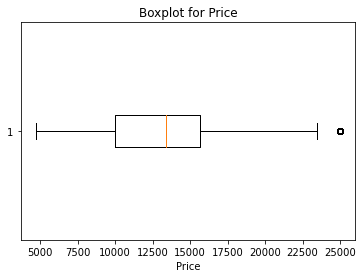

In [13]:
#Finding outliers in the price feature
plt.boxplot(final_df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot for Price')
plt.show()

### Top 10 brands by Count

Itel S23                1800
Tecno Pop 8              900
Xiaomi Redmi 14C         900
Samsung Galaxy A15       900
Samsung Galaxy A05       900
Infinix Smart 8          600
Samsung  Galaxy A05S     600
Xiaomi Redmi Note 13     600
Xiaomi Redmi A3          600
Tecno Spark 20           600
Name: Brand, dtype: int64


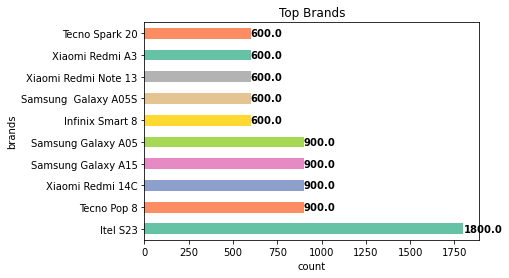

In [14]:
top_brands = final_df['Brand'].value_counts().head(10)
print(top_brands)

#visualize
ax = top_brands.plot(kind='barh', color=sns.color_palette("Set2", n_colors=len(top_brands)))
plt.xlabel('count')
plt.ylabel('brands')
plt.title('Top Brands')

# Annotate each bar with the exact rating value inside the bar
for i, v in enumerate(top_brands):
    ax.text(v + 0.05, i, f'{v:.1f}', color='black', va='center', fontweight='bold')

plt.show()

From the visualisation, Itel S23 appears to be the brand with the highest count of sold phones.


### Top Brands by Rating

Brand
Infinix Smart 8         4.8
Itel S23                4.8
Xiaomi Redmi 14C        4.8
Samsung Galaxy A05S     4.6
Samsung Galaxy A05      4.5
Xiaomi Redmi A3         4.5
Xiaomi Redmi Note 13    4.5
Samsung  Galaxy A05S    4.4
Tecno Pova 6 Neo        4.4
Tecno Spark 20          4.4
Name: Rating, dtype: float64


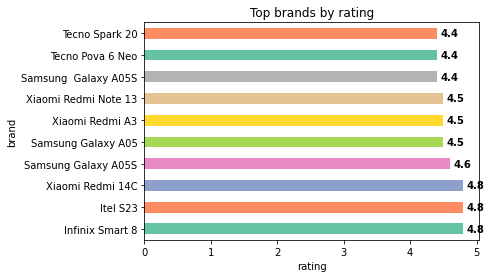

In [15]:
top_rated = final_df.groupby('Brand')['Rating'].max().nlargest(10)
print(top_rated)

ax = top_rated.plot(kind='barh', color=sns.color_palette("Set2", n_colors=len(top_rated)))

plt.xlabel('rating')
plt.ylabel('brand')
plt.title('Top brands by rating')

# Annotate each bar with the exact rating value inside the bar
for i, v in enumerate(top_rated):
    ax.text(v + 0.05, i, f'{v:.1f}', color='black', va='center', fontweight='bold')
    
    
plt.show()

### Checking for missing values

In [16]:
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Camera               3300
Battery Power        2700
Number of SIMs       8700
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

In [17]:
#Fill the null values in the column Old Price with the current price of the phone
final_df['Old Price'] = final_df['Old Price'].fillna(final_df['Price'])
#Calculate the discounts from the Old Price and Current Price
final_df['Discount'] = final_df['Discount'].fillna((final_df['Old Price'] - final_df['Price']) / 100)
#For the Ratings fill 0 as it potentially mean that the product has not yet been rated or shipped.
final_df['Rating'] = final_df['Rating'].fillna(0)
#Check for the null values
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Camera               3300
Battery Power        2700
Number of SIMs       8700
Price                   0
Old Price               0
Discount                0
Rating                  0
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

In [18]:
# replace all missing color with 'Unknown colour'
final_df['Color'] = final_df['Color'].fillna('Unknown')

# replace number of sims missing values with 1
final_df['Number of SIMs'] = final_df['Number of SIMs'].fillna(1.0)

final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                   0
Warranty             9000
Camera               3300
Battery Power        2700
Number of SIMs          0
Price                   0
Old Price               0
Discount                0
Rating                  0
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

In [19]:

# fill the missing screensize with the median whuc is better than mode since it is heavily negavitely skewed (-3.52) with most values clustering around larger screen size and a longer tail on the small screen
# using mode can lead to a misleading imputation, especially in the case of skewed dist. where outliers have a disproportionate effect.
final_df['Screen Size'] = final_df['Screen Size'].fillna(final_df['Screen Size'].median())



In [20]:
# Filter rows where Camera is NaN
phones_with_nan_camera = final_df[final_df['Camera'].isna()]

# Count the number of unique brands with NaN Camera
print(phones_with_nan_camera['Brand'].value_counts())

# Dictionary with phone models and their corresponding rear camera megapixels (numeric only) aquired from the internet
camera_specs = {
    "Xiaomi Redmi 14C": 50,  # 50 MP camera
    "Xiaomi Redmi A3": 13,   # 13 MP camera
    "Infinix Smart 8": 13,   # 13 MP camera
    "Samsung Galaxy A05S": 50,  # 50 MP camera
    "Oppo A83 4Gb Ram": 13,   # 13 MP camera
    "Oppo A17K": 50,          # 50 MP camera
    "Itel A18": 5            # 5 MP camera
}

# Function to replace NaN values with the camera specs from the dictionary (numeric only)
def replace_camera_specs(row):
    if pd.isna(row['Camera']) and row['Brand'] in camera_specs:
        return camera_specs[row['Brand']]
    return row['Camera']

# Apply the function to the 'Camera' column
final_df['Camera'] = final_df.apply(replace_camera_specs, axis=1)

# Check unique values in the 'Camera' column
final_df['Camera'].unique()

# Remove the 'MP' suffix and convert the values to numeric (integer)
final_df['Camera'] = final_df['Camera'].replace(to_replace=r'\D', value='', regex=True).astype(float)

print(final_df['Camera'].isna().sum())

Xiaomi Redmi 14C       900
Xiaomi Redmi A3        600
Infinix Smart 8        600
Samsung Galaxy A05S    300
Oppo A83 4Gb Ram       300
Oppo A17K              300
Itel A18               300
Name: Brand, dtype: int64
0


In [21]:
# replace warranty missing values with 'None'
final_df['Warranty'] = final_df['Warranty'].fillna(0)

# use regx to extract only the numeric part from Warranty
final_df['Warranty'] = final_df['Warranty'].astype(float)

final_df['Warranty'].head(5)

0    2.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Warranty, dtype: float64

In [22]:
# Check the count of each unique value in the 'Battery Power' column
battery_power_counts = final_df['Battery Power'].value_counts()

# Display the counts of the unique values in 'Battery Power'
print(battery_power_counts)

# Impute missing values with the most frequent value (mode)
final_df['Battery Power'] = final_df['Battery Power'].fillna(final_df['Battery Power'].mode()[0])

# use regx to extract only the numeric part from Battery Power
final_df['Battery Power'] = final_df['Battery Power'].str.extract('(\d+)')

# change tofloat
final_df['Battery Power'] = final_df['Battery Power'].astype(float)


5000mAh    7500
5160mAh     600
7000mAh     300
2400mAh     300
3000mAh     300
5057mAh     300
Name: Battery Power, dtype: int64


In [23]:
final_df.isnull().sum()

Brand                0
Screen Size          0
RAM                  0
ROM                  0
Color                0
Warranty             0
Camera               0
Battery Power        0
Number of SIMs       0
Price                0
Old Price            0
Discount             0
Rating               0
Number of Reviews    0
Search Ranking       0
Page                 0
Rank                 0
dtype: int64

### Check for dupliates

In [24]:
final_df.duplicated().sum()

0

### Correlation

In [25]:
final_df.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Old Price            0.778953
Camera               0.694238
ROM                  0.676142
RAM                  0.533064
Battery Power        0.509556
Screen Size          0.446941
Rating               0.106853
Rank                 0.071768
Warranty             0.049099
Number of Reviews    0.045858
Number of SIMs       0.005919
Page                 0.000060
Discount            -0.037581
Name: Price, dtype: float64

In this dataset, Old price, ROM, RAM have the highest positive correlation to price unlike page and discount. Number of sims is negatively correlated to price. A heatmap demonstrates this relationship of the features to other featres and price.

### A HeatMap to visualize patterns

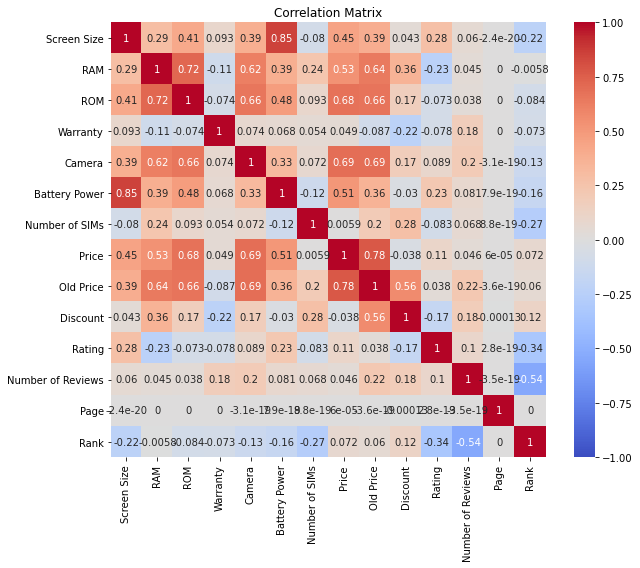

In [26]:
correlation_matrix = final_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()

### DATA PRE-PROCESSING
Before training the model, it is crucial to ensure that the data is clean, well-structured, and ready for analysis. The pre-processing steps below will help in preparing the data for modeling, ensuring that the model can learn effectively and provide accurate predictions.

We followed this steps to avoid Data leakage:

1. Split the Data: Divide the dataset into training, validation, and test sets to properly evaluate the model's performance. The training set is used to train the model, the validation set helps with hyperparameter tuning, and the test set provides an unbiased evaluation of the final model.

2. Confirm Missing Values: Identify and address any missing values to ensure data consistency which helps improve the model's reliability and performance.

3. Handle Categorical Data: Convert categorical data into a format that the model can interpret. This allows the model to capture relationships between categories, which enhances overall model performance.

4. Standardize the Data: Standardizing features to a common scale improves model convergence speed, stability, and performance by preventing features with larger ranges from disproportionately influencing the model.

### TRAIN TEST SPLIT

In [27]:
#Define the x variables
x = final_df.drop(columns=['Price', 'Page', 'Rank', 'Search Ranking', 'Discount', 'Rating', 'Number of Reviews', 'Old Price'])

# Define the target variable y as 'Price'
y = final_df['Price']

# First, split into train and temp (75% train, 25% temp)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)

# Then, split temp into validation and test (50% of the temp data for validation, 50% for testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

print(f"Training size:", len(X_train))
print(f"Validation size:", len(X_val))
print(f"Test size:", len(X_test))

Training size: 9000
Validation size: 1800
Test size: 1200


In [28]:
# import relevant libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [29]:


# Define preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline for numeric features (scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (imputation and encoding)
categorical_transformer = Pipeline(steps=[  # Handle missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))  
])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessor to the training, validation, and test data
X_train_processed = preprocessor.fit_transform(X_train)  # Apply transformation to training data
X_val_processed = preprocessor.transform(X_val)  # Apply transformation to validation data
X_test_processed = preprocessor.transform(X_test)  # Apply transformation to test data

# Get the names of the transformed columns
# This will handle the column names for both numeric and categorical features
numeric_col_names = numeric_features
categorical_col_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categorical_features)

# Combine numeric and categorical feature names
all_feature_names = pd.Index(numeric_col_names).append(pd.Index(categorical_col_names))


# Create DataFrames with proper shapes
X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index, columns=all_feature_names)
X_val_processed_df = pd.DataFrame(X_val_processed, index=X_val.index, columns=all_feature_names[:X_val_processed.shape[1]])  # Adjusting to the right shape
X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index, columns=all_feature_names[:X_test_processed.shape[1]])  # Adjusting to the right shape

# Print the processed DataFrames and their shapes
print("Shape of X_train_processed_df:", X_train_processed_df.shape)
print("Shape of X_val_processed_df:", X_val_processed_df.shape)
print("Shape of X_test_processed_df:", X_test_processed_df.shape)





Shape of X_train_processed_df: (9000, 45)
Shape of X_val_processed_df: (1800, 45)
Shape of X_test_processed_df: (1200, 45)


In [30]:
print(X_train_processed_df.columns)

Index(['Screen Size', 'RAM', 'ROM', 'Warranty', 'Camera', 'Battery Power',
       'Number of SIMs', 'Brand_Infinix Hot', 'Brand_Infinix Hot 40I',
       'Brand_Infinix Smart 8', 'Brand_Itel A18', 'Brand_Itel S23',
       'Brand_Oale Pop 8', 'Brand_Oppo A17K', 'Brand_Oppo A83 4Gb Ram',
       'Brand_Samsung  Galaxy A05S', 'Brand_Samsung Galaxy A05',
       'Brand_Samsung Galaxy A05S', 'Brand_Samsung Galaxy A15',
       'Brand_Tecno Pop 8', 'Brand_Tecno Pova 6 Neo', 'Brand_Tecno Spark',
       'Brand_Tecno Spark 20', 'Brand_Tecno Spark 20C', 'Brand_Villaon V20 Se',
       'Brand_Xiaomi Redmi 13C', 'Brand_Xiaomi Redmi 14C',
       'Brand_Xiaomi Redmi A3', 'Brand_Xiaomi Redmi Note 13', 'Color_Black',
       'Color_Blue', 'Color_Crystal Green', 'Color_Cyber White',
       'Color_Elemental Blue', 'Color_Energetic Orange', 'Color_Gravity Black',
       'Color_Luxurious Gold', 'Color_Midnight Black', 'Color_Mystery White',
       'Color_Navy Blue', 'Color_Shiny Gold', 'Color_Silver',
       'C

### DATA MODELING
We shall build different models using our clean data to find the optimal model that will predict the price of the phone based on the brand.

In [31]:
# import relevant libraries
# Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV




#### Linear Regression

Training Mean Absolute Error: 2.5246226092444526
Validation Mean Absolute Error: 3.4442896631028916


Training R2 Score: 0.9999943274532466
Validation R2 Score: 0.9998957377711128


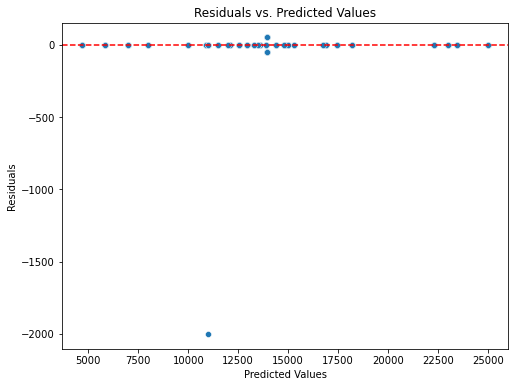

In [32]:
# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Predict the values
y_hat_train = lr_model.predict(X_train_processed)
y_hat_val = lr_model.predict(X_val_processed)

# Calculate the regression scores
train_mae = mean_absolute_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)
val_mae = mean_absolute_error(y_val, y_hat_val)
val_r2 = r2_score(y_val, y_hat_val)

print(f"Training Mean Absolute Error:", train_mae)
print(f"Validation Mean Absolute Error:", val_mae)
print("\n")
print(f"Training R2 Score:", train_r2)
print(f"Validation R2 Score:", val_r2)

# Calculate residuals
residuals = y_val - y_hat_val

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_hat_val, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

Training MAE: 2.52, Validation MAE: 3.44 – Slight increase in error on the validation set suggests some overfitting.
Training R²: 0.99999, Validation R²: 0.99989 – Small difference in R² scores also indicates minor overfitting.
The model is performing extremely well, but slight overfitting is a concern.

#### K-Folds On Baseline Model
Cross validation provides a comprehensive understanding of our model’s performance because it tests the model on multiple sets of data reducing the risk of our model’s performance being overly optimistic or pessimistic based on one split. In summary it helps detect overfitting or underfitting by observing how the model performs across multiple different subsets.

In [33]:
# Calculate cross-validation MAE scores on training data
cv_mae_baseline = cross_val_score(lr_model, X_train_processed, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae_baseline.mean()  
print(f"Cross-validated Training MAE: {mean_cv_mae}")

# Perform K-Fold Cross-Validation (R-squared scoring)
cv_r2_scores = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='r2')

# Print the R-squared for each fold
print("Cross-Validation R-squared for each fold:", cv_r2_scores)

# Print the average R-squared score across all folds
print("Average R-squared from Cross-Validation:", np.mean(cv_r2_scores))


Cross-validated Training MAE: 2.5366800519095523
Cross-Validation R-squared for each fold: [0.99999542 0.9999935  0.99999334 0.99999442 0.99999456]
Average R-squared from Cross-Validation: 0.9999942501545405


Summary:

The Mean Absolute Error (MAE) from cross-validation is approximately 2.54. This means, on average, the model’s predicted smartphone prices deviate from the actual prices by about 2.54 units. This indicates that the model is making relatively small errors in its predictions, which is a good sign of its performance.

The R² scores for each of the 5 folds in the cross-validation are extremely high. These values indicate that in each fold, the model is explaining around 99.999% of the variance in the target variable (smartphone prices). This suggests that the model fits the data very well and is very effective at capturing the underlying relationships.


The model performs well with high R² scores and low MAE values, indicating it is predicting smartphone prices with a high degree of accuracy. The model's performance appears stable across both training and validation sets and cross-validation results reinforce this with a difference in 0.297 on the train mae. However, a slight improvement in MAE is possible, especially in terms of reducing prediction errors further.

The residual plot above shows that we have some points close to the predicted line and also some which have deviated significantly. This signals that the model isn't perfect for all data points. One possible reason for this might be due to non-linearity. We shall therefore proceed to model using polynomial regression or other models capable of capturing non-linear relationships like the decision trees, random forests, or support vector machines.



### Decision Tree Regressor
Trying a Decision Tree Regressor would allow us to explore a non-linear model that doesn’t rely on the polynomial feature transformations of linear models. It could reveal different insights into the feature interactions and provide a more interpretable model. The tree’s flexibility to capture complex patterns and the ability to control overfitting with hyperparameters makes it an attractive candidate to compare with your existing polynomial regression model.

In [34]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Model
clf.fit(X_train_processed, y_train)

# Make Predictions
y_hat_train = clf.predict(X_train_processed)
y_hat_val = clf.predict(X_val_processed)

# Calculate the MAE for the training and validation sets
train_mae = mean_absolute_error(y_train, y_hat_train)
train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)

val_mae = mean_absolute_error(y_val, y_hat_val)
val_mse = mean_squared_error(y_val, y_hat_val)
val_r2 = r2_score(y_val, y_hat_val)


# Evaluate the model using classification metrics
train_accuracy = accuracy_score(y_train, y_hat_train)
val_accuracy = accuracy_score(y_val, y_hat_val)

# Print the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("\nClassification Report (Validation):")

# Print the results
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")
print("\n")
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")




Training Accuracy: 0.9755555555555555
Validation Accuracy: 0.975

Classification Report (Validation):
Training MAE: 2.468888888888889
Training MSE: 249.35777777777778
Training R2: 0.9999889015391162


Validation MAE: 3.5805555555555557
Validation MSE: 2473.802777777778
Validation R2: 0.9998898893779362



MAE (2.46) and MSE (249.35) for the training set indicate the model fits the training data well. R² is close to 1, which typically suggests the model captures almost all variance in the training data.

Validation MAE (3.58) and MSE (2473.80) are significantly higher, showing that the model might be overfitting the training data.
Despite this, the R² for validation (0.9998) is still extremely high, which seems unusual if there’s a substantial increase in MAE and MSE.

To handle any overfitting concerns we shall proceed to try the Random Forest as this is an ensemble model that combines the predictions of multiple decision trees. Each tree in the forest is trained on a random subset of the data and features. This helps reduce the variance that can be high in a single decision tree, thus preventing overfitting.

### Random Forest Classifier

In [39]:
# Random Forest Classifier Initialization
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train_processed, y_train)

# Predict on the validation and train set
y_pred_train = rf.predict(X_train_processed)
y_pred_val = rf.predict(X_val_processed)

#calculate the metrics value on train set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


#calculate the metrics value on validation set
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{mae_train}")
print(f"Train Squared Error: {mse_train}")
print(f"Train R-squared: {r2_train}")
print("\n")
print(f"Val Mean Absolute Error:{mae}")
print(f"Val Squared Error: {mse}")
print(f"Val R-squared: {r2}")



Train Mean Absolute Error:2.523698344376543
Train Squared Error: 127.449652230195
Train R-squared: 0.9999943274479243


Val Mean Absolute Error:3.4435319168364207
Val Squared Error: 2342.431811536008
Val R-squared: 0.9998957367878203


The Random Forest Regressor model shows nearly identical results to the Decision Tree model. The MAE, MSE, and R² values are extremely close between the two models suggesting that the Random Forest model has provided similar performance on the training and validation sets.

Both models perform excellently but if we are aiming for even more stability or anticipate working with more complex data in the future then Random Forest will be our generally preferred model.

#### Hyperparameter Tuning The Random Forest

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found
best_rf = grid_search.best_estimator_

#Evaluate on Train Data
y_pred_train = best_rf.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate on validation set
y_pred_val = best_rf.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")
print("-------------------")

print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R-squared: {val_r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 15.0min finished


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training MAE: 2.523698344376543
Training MSE: 127.449652230195
Training R-squared: 0.9999943274479243
-------------------
Validation MAE: 3.4435319168364207
Validation MSE: 2342.431811536008
Validation R-squared: 0.9998957367878203


The hyperparameter-tuned Random Forest model is highly effective for your regression problem. It achieves:

Excellent predictive performance with very high R² on both training and validation sets.
Low prediction errors (MAE and MSE).
Minimal signs of overfitting, as training and validation metrics are consistent.
This indicates that Random Forest is a strong and reliable model for this dataset. You can confidently use this model for making predictions on new, unseen data


#### Results on Test Data

In [ ]:
# Predict on Test data
y_pred_test = best_rf.predict(X_test_processed)
#Metrics on test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse= mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
#print the results
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test MAE: 2.8244645419212975
Test MSE: 142.95858545116766
Test R-squared: 0.9999934514755243


Performance: The model shows outstanding predictive accuracy across all datasets (training, validation, and test).
Generalization: There is very little discrepancy between training, validation, and test performances, confirming that the model generalizes well to new data.
Model Choice: Random Forest is a great choice for this regression task, as it handles the complexity and the relationships between features very effectively.


### Extreme Gradient Boost

In [40]:
# Instantiate the model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train_processed)
y_pred_val = xgb_model.predict(X_val_processed)
y_pred_test = xgb_model.predict(X_test_processed)

# Evaluate on the training set
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate on the validation set
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)



# Print the results
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")
print("\n")
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R-squared: {val_r2}")
print("\n")


Training MAE: 2.5254344075520834
Training MSE: 127.44953522181511
Training R-squared: 0.9999943274531321


Validation MAE: 3.4451082356770835
Validation MSE: 2342.4116783773898
Validation R-squared: 0.9998957376839607




The performance on the training data is excellent, with both MAE, MSE, and R² metrics indicating that the model is fitting the data very well. However, the model's performance on the validation set is still strong, though slightly worse (higher MAE and MSE, lower R²), which is typical for machine learning models. The model is likely overfitting slightly to the training data, but the drop in performance is minimal.

In [41]:
# Evaluate on the test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test MAE: 2.8259236653645834
Test MSE: 142.93306375026702
Test R-squared: 0.9999934526446006


Test MAE: A lower value means your model’s predictions are closer to the actual values.
Test MSE: A lower value indicates fewer large errors in predictions.
Test R-squared: A value close to 1 means the model is doing well at explaining the variance in the test set, while a lower value indicates the model doesn’t explain the data as well.

### Gradient Boosting Regressor

In [42]:
# Define a parameter grid with different learning rates to try
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Different learning rates to try
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation and Mean Squared Error as the scoring metric
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train_processed, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Learning Rate: {best_params}")

# Get the best model after grid search
best_gbr = grid_search.best_estimator_

# Predict on the train and validation set with the best model
y_pred_train = best_gbr.predict(X_train_processed)
y_pred_val = best_gbr.predict(X_val_processed)

# Calculate MAE, MSE, and R2 score on Train Data
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Calculate MAE, MSE, and R2 score on Validation Data
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

# Print the results
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Train Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")
print("\n")
print(f"Val Mean Absolute Error: {val_mae}")
print(f"Val Squared Error: {val_mse}")
print(f"Val R-squared: {val_r2}")

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.6min finished


Best Learning Rate: {'learning_rate': 1.0}
Train Mean Absolute Error: 2.5237530872904017
Train Squared Error: 127.44953086419753
Train R-squared: 0.9999943274533261


Val Mean Absolute Error: 3.4433950625957297
Val Squared Error: 2342.412778319609
Val R-squared: 0.9998957376350015


Your model shows excellent performance on both the training and validation datasets, as indicated by the low MAE, low MSE, and high R² scores. The model performs slightly better on the training set compared to the validation set.  Despite the slight overfitting, the model still generalizes well, and the high R² for both training and validation sets shows that the model can predict new, unseen data with high accuracy.

In [43]:

# Predict on Test data
y_pred_test = best_gbr.predict(X_test_processed)
#Metrics on test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse= mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
#print the results
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test MAE: 2.8242592601169516
Test MSE: 142.93154238755156
Test R-squared: 0.9999934527142899


: The model is not overfitting as the results on the test set are still excellent, indicating that the model generalizes well across different data sets (training, validation, and testing)

### Summary
The Random Forest and Gradient Boosting models provided the best results in terms of predictive performance, generalization, and error minimization. Both models demonstrated strong R² values (close to 1) and low MAE, indicating that they could effectively predict the target variable with minimal error. These models are preferable when seeking robust, non-linear predictions, especially in complex datasets with multiple features.

Mean Squared Error (MSE): Random Forest again has the lowest MSE (24,035.17), with Gradient Boosting and XGBoost both slightly higher at around 24,065.98. Lower MSE in Random Forest suggests it has slightly fewer large errors on the test data, though the differences are minimal.

R-squared: All three models achieved virtually identical R-squared scores of 0.99889, indicating that each model explains roughly 99.89% of the variance in the test data. This very high R-squared demonstrates that all three models effectively capture the data’s trends.

Conclusion While all three models perform similarly and have almost identical test metrics, Random Forest has a slight edge due to its lowest MAE and MSE. If computational efficiency is a factor, Random Forest might be preferred as it generally trains faster than boosting models. However, XGBoost and Gradient Boosting could still be considered if stability and ensemble robustness are priorities.